<a href="https://colab.research.google.com/github/Yael-Parra/Lasso_Regression_L1/blob/main/Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

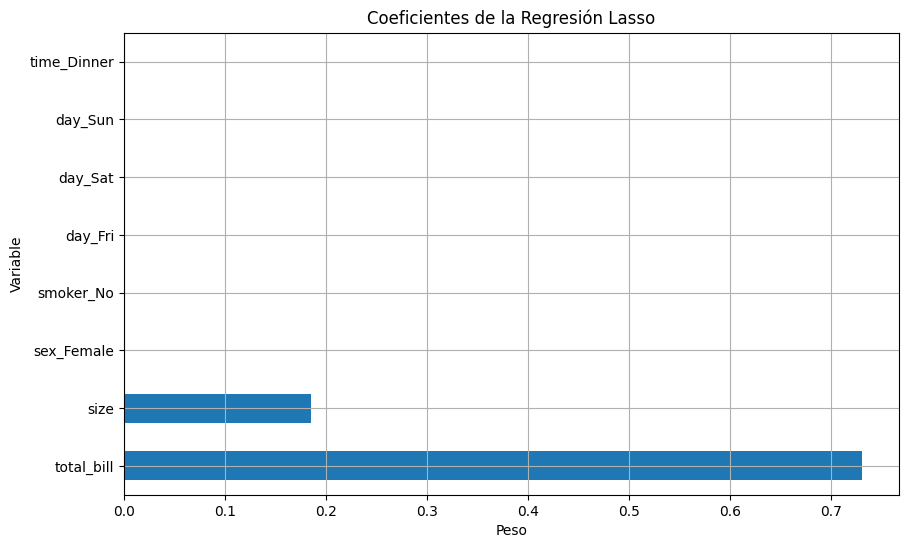

R^2 en entrenamiento: 0.45
R^2 en prueba: 0.51


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Cargar el dataset 'tips'
df = sns.load_dataset('tips')

# 2. Preprocesamiento: convertir variables categóricas a dummies
df_encoded = pd.get_dummies(df, drop_first=True)

# 3. Separar X (features) e y (target)
X = df_encoded.drop('tip', axis=1)
y = df_encoded['tip']

# 4. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Estandarizar las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Aplicar regresión Lasso
lasso = Lasso(alpha=0.1)  # Puedes ajustar alpha
lasso.fit(X_train_scaled, y_train)

# 7. Mostrar los coeficientes
coef = pd.Series(lasso.coef_, index=X.columns)

# 8. Visualizar los coeficientes
plt.figure(figsize=(10, 6))
coef.plot(kind='barh')
plt.title('Coeficientes de la Regresión Lasso')
plt.xlabel('Peso')
plt.ylabel('Variable')
plt.grid(True)
plt.show()

# 9. Puntaje del modelo
print(f"R^2 en entrenamiento: {lasso.score(X_train_scaled, y_train):.2f}")
print(f"R^2 en prueba: {lasso.score(X_test_scaled, y_test):.2f}")
